# Data Science Wizards!

## Instructors: Shervin Manzuri, Levin Noronha, Morteza Alipour

# Introduction! 

This is going to be your first venture into **DATA SCIENCE**! Data science is the cool job of doing magic with piles of stuff most people don't understand!

A data scientist is basically a **wizard**! These wizards will get certain ingredients in the forms of **RAW Data** and they will make them into an **easily digestable data potion**! Then using **magic** they will predict the future! However before you become magicians you will first need to improve your **Cooking** skill!

## What potion we are making?

We want to look at **DC** and **Marvel** comic characters and do data science wizardry with them! So our ingredients will be their data.

What does a good cook usually do?

## 1. Fetching the Ingredients

As a data scientist wizard, you first need to gather your **necessary ingredients**. Wizards use herbs and water to make potions! But data scientist wizards use... wait for it... **DATA**. Just as a good potion needs quality herbs, good data scientists need to carefully choose their data. If they use bad data, they might create **poisonous potions**! We really don't want poison now do we? 

Now the question is...

### 1.1. How do we choose the data?

The first rule of thumb for wizards when picking quality herbs is they must be **clean**, **fresh** and without **pests**! 

Well you guessed it, it's exactly the same case for data scientist wizards. Because we *are* wizards.

Your first job as a data scientist wizard is to **pick and clean your ingredients**! LET'S GO!

#### Importing

The first step when writing python magic is importing your tools! We will do this for you. The tools we will import are two friendly neighborhood sidekicks named *pandas*, *numpy* and their projector device that is called *matplotlib*. We will call upon *pandas* and *numpy* to help us later.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore')

#### Fetching our Ingredients

Now we need python, our sidekick to fetch (read) the ingredients we want to clean! We need to tell it the address of where to find the ingredient! Both our ingredients are in our computer so we need to tell it the local address!


In [3]:
#Our First ingredient!
heroes_info = pd.read_csv("heroes_information.csv",index_col = 0)
#Our second ingredient!
superhero_powers = pd.read_csv("super_hero_powers.csv")

#### Now that we have our ingredients...

We need to see how much of each we have, our ingredients come in packages and they can be of different types, shapes, lengths, *smells* or even tastes.

To explore our data ingredients we can ask our friend *pandas* to **describe** them for us. We have to ask him separately for each ingredient as **pandas are lazy**!

#### Let's ask pandas to show us 5 pieces of our first ingredient, **superhero powers**:

In [4]:
superhero_powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Let's ask pandas to show us 6 pieces of our second ingredient, **superhero info**:

In [5]:
heroes_info.head(6)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0


## 2. Cleaning our ingredients

Now that we have seen what our ingredients look like, we need to clean them up! Now when we want to clean up food ingredients we look for dirty parts, stale parts or parts that don't make sense (we don't want to put nails in our soup!).

The same goes for **data cleaning**. When we want to clean our data ingredients, we will look for:

    1. Data rows that don't make sense.
    2. Data rows that look wrong, but otherwise we can use them.
    3. Data we don't think we will need.
    
Now looking at the tables above, which ones do you think don't make sense? Which ones we need but need to change how they look? and which ones we won't need?

### 2.1 Don't look ahead! We need your expertise first!

## 2.1.1 You haven't been looking ahead now have you?






### 2.2 Now that you have some insight, let's see what needs to be cleaned!

We don't want problems of type 1 and 2 affect our analysis.

    1. Do you think a height of -99 or weight of -99 makes sense?
    2. We need to let python know if we don't have information about something. Otherwise it wouldn't know what to do! The way we do this is by turning cells with "-" into "NA" (not a number).
    
And we want to drop certain values!

    3. We want to compare Marvel to DC! So we need to drop all heroes that don't belong to them.

In [6]:
# Changing -99 height to NA
heroes_info.loc[heroes_info['Height'] < 0, 'Height'] = np.nan
heroes_info.loc[heroes_info['Weight'] < 0, 'Weight'] = np.nan

# Changing - to NA
superhero_powers = superhero_powers.replace('-', np.nan) #Do you know why we put the semicolon here? remove it and see!
heroes_info = heroes_info.replace('-', np.nan)

# Dropping non Marvel and non DC
superhero_powers = superhero_powers.rename(columns ={'hero_names':'name'})
merged_data = pd.merge(heroes_info, superhero_powers, on='name')

dc_data = merged_data.drop(merged_data.loc[(merged_data['Publisher']!='DC Comics')].index)
marvel_data = merged_data.drop(merged_data.loc[(merged_data['Publisher']!='Marvel Comics')].index)
mdc_data = pd.concat([dc_data, marvel_data], axis=0).reset_index(drop = True)

#### Now let's display our cleaned data!

In [7]:
display(mdc_data)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
1,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,NaN,good,88.0,...,False,False,False,False,False,False,False,False,False,False
2,Alan Scott,Male,blue,NaN,Blond,180.0,DC Comics,NaN,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Amazo,Male,red,Android,NaN,257.0,DC Comics,NaN,bad,173.0,...,False,False,False,False,False,False,False,False,False,False
4,Animal Man,Male,blue,Human,Blond,183.0,DC Comics,NaN,good,83.0,...,False,False,False,False,False,False,False,False,False,False
5,Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,NaN,bad,NaN,...,False,True,False,False,False,False,False,False,False,False
6,Aquababy,Male,blue,NaN,Blond,NaN,DC Comics,NaN,good,NaN,...,False,False,False,False,False,False,False,False,False,False
7,Aqualad,Male,blue,Atlantean,Black,178.0,DC Comics,NaN,good,106.0,...,False,False,False,False,False,False,False,False,False,False
8,Aquaman,Male,blue,Atlantean,Blond,185.0,DC Comics,NaN,good,146.0,...,False,False,False,False,False,False,False,False,False,False
9,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,NaN,bad,126.0,...,False,False,False,False,False,False,False,False,False,False


## 3. Let's Analyse the Data

Now that we have our ingredients cleaned up we can start looking at how they would cook together. As a data scientist wizard you have to look at data to find interesting insights. Sometimes this data is already cleaned up and sometimes you have to clean it up.

By looking at how small parts in your data are related to each other, you can start making educated guesses about how they work or how their behaviour can be predicted. Which is basically **magic**. We want to look at our cleaned data from different perspectives, look at how they're distributed and the insteresting insights we can learn from that.

### 3.1. Distribution Analysis

Data distribution is the most important part of a wizard's job. The distribution of our data parts can help us with predicting the future.

Our data contains rows and columns, each row is a **sample** and each column is a **feature**. Most of the time we compare the distributions of two features because we have samples to create our distribution shape! The shape of our distribution is also called its **probability density function**.

Now without going into the boring math (or amazingly beatiful math) of this thing, we will do an easier explanation. We show the distribution using **histograms**. a Histogram is like having many buckets, and every time you see a new sample, you put it into the correct bucket where only specific numbers can go in.

Now to draw the histograms, our samples must be of **numerical type**! This means we can only use numbers! 

Let's draw some histograms! One interesting thing to do would be comparing the distributions of some features! You choose!

In [8]:
first_hist_input = mdc_data.loc[(mdc_data['Gender'] == 'Male'),'Height']
second_hist_input = mdc_data.loc[(mdc_data['Gender'] == 'Female'),'Height']

Now that we have chosen our features to compare, we draw the histogram! Two things you can play with:

    1- Number of buckets for each histogram: between 10-1000
    2- The limits of our plot: plt.xlim(beginning, end)

(50, 210)

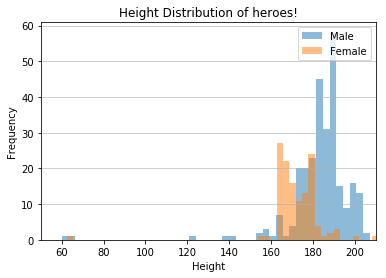

In [9]:
first_histogram_buckets = 300
second_histogram_buckets = 100

plt.hist(first_hist_input, first_histogram_buckets, alpha=0.5, label='Male')
plt.hist(second_hist_input, second_histogram_buckets, alpha=0.5, label='Female')

plt.legend(loc='upper right')
plt.title('Height Distribution of heroes!')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.xlim(50,210) 

### 3.2. Frequency Analysis

Now we're going to look at our heroes and see which features happen more frequently in them! Our idea is, some superpowers are more abundant than others! So heroes with these superpowers won't be very unique! Let's try to find what are the most **common** super powers that heroes have.

In [10]:
from collections import Counter

#### How do we count the superpowers?

We need to go through our superpowers and count the number of times they appear in any hero! Then we will sum them up and extract the top 20 most common super powers both in the Marvel and the DC universe, then we will see how they relate to each other!

In [11]:
pf_dic_dc = {}
for column in dc_data.columns[10:]:
    pf_dic_dc[column] = sum(dc_data[column])
    
pf_dic_mar = {}
for column in marvel_data.columns[10:]:
    pf_dic_mar[column] = sum(marvel_data[column])

max_twenty_mar = dict(Counter(pf_dic_mar).most_common(20))
max_twenty_dc = dict(Counter(pf_dic_dc).most_common(20))

#### Now that we have our top 20 most common super powers for each universe, we will combine them into one table!

In [12]:
max20_mar_data = pd.DataFrame({'Power':list(max_twenty_mar.keys()),'Frequency':list(max_twenty_mar.values()), 'Publisher':['Marvel']*20})
max20_dc_data = pd.DataFrame({'Power':list(max_twenty_dc.keys()),'Frequency':list(max_twenty_dc.values()), 'Publisher':['DC']*20})

max_powers = pd.concat([max20_dc_data, max20_mar_data], axis = 0)

#### Now we will draw a Horizontal bar plot! 

a Horizontal bar plot is really cool! It stacks the number of times we see something and then can differentiate between each universe! Just wait and see.

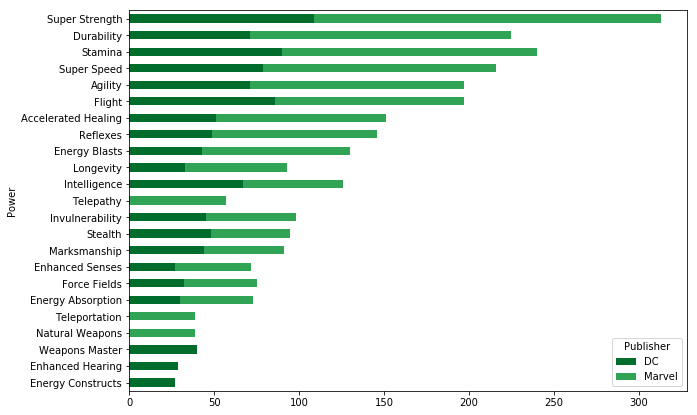

In [13]:
colors = ["#006D2C", "#31A354","#74C476"]
pivot_df = pd.pivot_table(max_powers,index='Power', columns='Publisher', values='Frequency', fill_value=0)
pivot_df = pivot_df.reindex(pivot_df.sort_values(by='DC', ascending=True).index)
pivot_df = pivot_df.reindex(pivot_df.sort_values(by='Marvel', ascending=True).index)

pivot_df.plot.barh(stacked=True, color=colors, figsize=(10,7))

### 3.3. Bad Guy Analysis

Now let's look at Marvel and DC. Which universe do you think has more **bad** heroes compared to good heroes?

In [16]:
# Data
r = [0,1]
# Get Marvel data
marvel_alignment = mdc_data.loc[(mdc_data['Publisher'] == 'Marvel Comics'),'Alignment'].value_counts()
marvel_alignment_dict = marvel_alignment.to_dict()
# Get DC data
dc_alignment = mdc_data.loc[(mdc_data['Publisher'] == 'DC Comics'),'Alignment'].value_counts()
dc_alignment_dict = dc_alignment.to_dict()
combined_alignment_dict = {}
# Combine Marvel and DC data
if marvel_alignment_dict.keys() == dc_alignment_dict.keys():
    for key in marvel_alignment_dict:
        combined_alignment_dict[key] = [marvel_alignment_dict[key], dc_alignment_dict[key]]
df = pd.DataFrame(combined_alignment_dict, index=['Marvel', 'DC'])
        
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['good'], df['bad'], df['neutral'])]
goodBars = [i / j for i,j in zip(df['good'], totals)]
neutralBars = [i / j for i,j in zip(df['neutral'], totals)]
badBars = [i / j for i,j in zip(df['bad'], totals)]

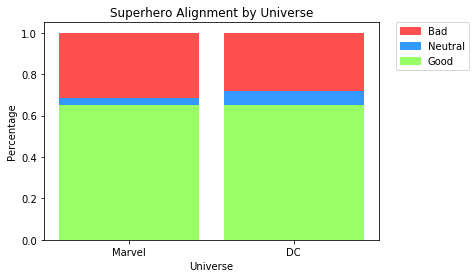

In [17]:
# plot
barWidth = 0.85
names = ('Marvel','DC')
# Create good bars
plt.bar(r, goodBars, color='#99ff66', width=barWidth)
# Create neutral bars
plt.bar(r, neutralBars, bottom=goodBars, color='#3399ff', width=barWidth)
# Create blue Bars
plt.bar(r, badBars, bottom=[i+j for i,j in zip(goodBars, neutralBars)], color='#ff5050', width=barWidth)
 
# Custom x and y axis
plt.xticks(r, names)
plt.xlabel("Universe")
plt.ylabel('Percentage')
 
import matplotlib.patches as mpatches

# Legend
good_patch = mpatches.Patch(color='#99ff66', label='Good')
neutral_path = mpatches.Patch(color='#3399ff', label='Neutral')
red_patch = mpatches.Patch(color='#ff5050', label='Bad')
plt.legend(handles=[red_patch, neutral_path, good_patch],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Title
plt.title('Superhero Alignment by Universe')

# Show graphic
plt.show()